<!-- ![RWTH Logo](https://www.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaaagazb) -->
![iAMB Logo](https://www.iamb.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaanwtny)
# Design of experiments

* Execute a single cell: <span class="fa-play fa"></span>
* Execute all cells: Menu: Run <span class="fa-chevron-right fa"></span> Run All Cells
* To reboot kernel: <span class="fa-refresh fa"></span>

Find more in the reference (menu: Help <span class="fa-chevron-right fa"></span> Jupyter Reference).

This workflow constructs the variables for a design of experiment and analyses the data.. 

Data folder:
 - `DoE`

Additional resources:
 - [DoEgen](https://github.com/sebhaan/DoEgen)
 - [Tutorial](https://www.moresteam.com/toolbox/design-of-experiments.cfm)
 - [Comprehensive DoE](https://learnche.org/pid/design-analysis-experiments/index)
 - [Coffee example](https://statease.github.io/dexpy/example-coffee.html)
 - [OLS analysis](https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html)
 - [OLS output description](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)
 - [Python experiment design](https://medium.com/mlearning-ai/design-of-experiments-doe-with-python-be88f5c013f5)
 - [Response optimization](https://towardsdatascience.com/response-optimization-with-design-of-experiments-and-python-63f9afb3f26f)

### Libraries
Loading required libraries for analysis.

 - Input:  None
 - Output: Text: `Libraries loaded.`

In [1]:
import os
# import glob
import pandas as pd
import numpy as np
from datetime import date
from scipy import stats
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols

## Load data

Upload the data into the `DoE` folder.

In [53]:
Today = date.today().strftime('%y%m%d')
Target_Dir = os.path.join('..', 'Data', 'DoE') # '/home/ulf/Documents/Ustilago_maydis-GEM/data/GrowthRates'
ImageType = 'png'
extensions = [".txt", ".csv"]
Files = [os.path.join(Target_Dir,f) for f in os.listdir(Target_Dir) if os.path.splitext(f)[1] in extensions]
[print(File) for File in Files];

../Data/DoE/SQ2.csv
../Data/DoE/DoE_example.txt
../Data/DoE/RSM 5 factors (DOE Conrad).csv


In [3]:
File = 'DoE_example.txt'
FileAddress = os.path.join(Target_Dir, File)
myDoE = pd.read_csv(FileAddress, sep='\t', skiprows=lambda x: x in [1,2])#, sep='\t', , skiprows=lambda x: x in [1,2]
myDoE.drop(myDoE.iloc[:,0:2], axis=1, inplace=True)
CentDoe = myDoE.apply(lambda x: (x-x.mean())/(x.std())) #(x.max()-x.min())/2


In [62]:
myDoE

A        B        C       D       E   F  G  Response1  Response2  \
0   300.000   33.330  150.000  12.000   1.330  20  1     0.9040      0.000   
1   166.665  166.665   83.335   6.665   6.665  25  2     0.1960      0.259   
2   300.000  300.000   16.670  12.000   1.330  30  3     0.0000      0.000   
3   300.000  300.000   16.670   1.330  12.000  30  3     0.0000      0.000   
4    33.330   33.330   16.670  12.000   1.330  20  3     0.0000      0.000   
5   300.000  300.000  150.000  12.000  12.000  20  1     0.1200      0.000   
6   300.000  300.000   16.670  12.000   1.330  20  1     0.0054      0.000   
7    33.330   33.330  150.000   1.330   1.330  30  1     0.0260      0.000   
8    33.330   33.330   16.670   1.330  12.000  30  1     0.0000      0.000   
9    33.330   33.330  150.000  12.000  12.000  20  1     0.3230      0.000   
10   33.330  300.000  150.000   1.330  12.000  30  1     0.0000      0.000   
11  300.000   33.330  150.000   1.330  12.000  20  1     0.3410      0.000   
12   33.330  300.000  150.000  12.000   1.330  20  3     0.0000      0.000   
13   33.330  300.000  150.000   1.330  12.000  20  3     0.0000      0.000   
14   33.330   33.330   16.670  12.000   1.330  30  1     0.0120      0.000   
15   33.330  300.000   16.670   1.330   1.330  30  3     0.0000      0.000   
16  300.000  300.000   16.670   1.330   1.330  30  1     0.0000      0.000   
17   33.330   33.330  150.000   1.330   1.330  20  3     0.0000      0.000   
18   33.330  300.000   16.670  12.000  12.000  30  1     0.1070      0.000   
19  300.000   33.330  150.000  12.000  12.000  20  3     0.2750      0.000   
20  300.000  300.000  150.000   1.330   1.330  30  3     0.2700      0.308   
21  300.000   33.330   16.670  12.000  12.000  20  1     0.1470      0.000   
22  166.665  166.665   83.335   6.665   6.665  25  2     0.0300      0.164   
23   33.330  300.000   16.670   1.330  12.000  20  1     0.0910      0.000   
24  166.665  166.665   83.335   6.665   6.665  25  2     0.0172      0.155   
25  300.000   33.330   16.670   1.330   1.330  30  3     0.0000      0.000   
26  300.000  300.000  150.000  12.000  12.000  30  3     0.2980      0.326   
27  300.000  300.000   16.670   1.330   1.330  20  3     0.0370      0.106   
28   33.330   33.330  150.000  12.000   1.330  30  3     0.0000      0.000   
29  300.000   33.330   16.670   1.330  12.000  20  3     0.1280      0.000   
30   33.330   33.330   16.670  12.000  12.000  30  3     0.0000      0.000   
31   33.330  300.000  150.000   1.330   1.330  20  1     0.0020      0.000   
32  300.000   33.330  150.000  12.000  12.000  30  1     0.3960      0.184   
33  166.665  166.665   83.335   6.665   6.665  25  2     0.0700      0.000   

    Response3  
0      0.9040  
1      0.4550  
2      0.0000  
3      0.0000  
4      0.0000  
5      0.1200  
6      0.0054  
7      0.0260  
8      0.0000  
9      0.3230  
10     0.0000  
11     0.3410  
12     0.0000  
13     0.0000  
14     0.0120  
15     0.0000  
16     0.0000  
17     0.0000  
18     0.1070  
19     0.2750  
20     0.5780  
21     0.1470  
22     0.1940  
23     0.0910  
24     0.1722  
25     0.0000  
26     0.6240  
27     0.1430  
28     0.0000  
29     0.1280  
30     0.0000  
31     0.0018  
32     0.5800  
33     0.0700

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>,
        <AxesSubplot:xlabel='E', ylabel='A'>,
        <AxesSubplot:xlabel='F', ylabel='A'>,
        <AxesSubplot:xlabel='G', ylabel='A'>,
        <AxesSubplot:xlabel='Response1', ylabel='A'>,
        <AxesSubplot:xlabel='Response2', ylabel='A'>,
        <AxesSubplot:xlabel='Response3', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>,
        <AxesSubplot:xlabel='E', ylabel='B'>,
        <AxesSubplot:xlabel='F', ylabel='B'>,
        <AxesSubplot:xlabel='G', ylabel='B'>,
        <AxesSubplot:xlabel='Response1', ylabel='B'>,
        <AxesSubplot:xlabel='Response2', ylabel='B'>,
        <AxesSubplot:xlabel='Response3', ylabel='B'>],
       [<AxesSubplot:xlabel='A

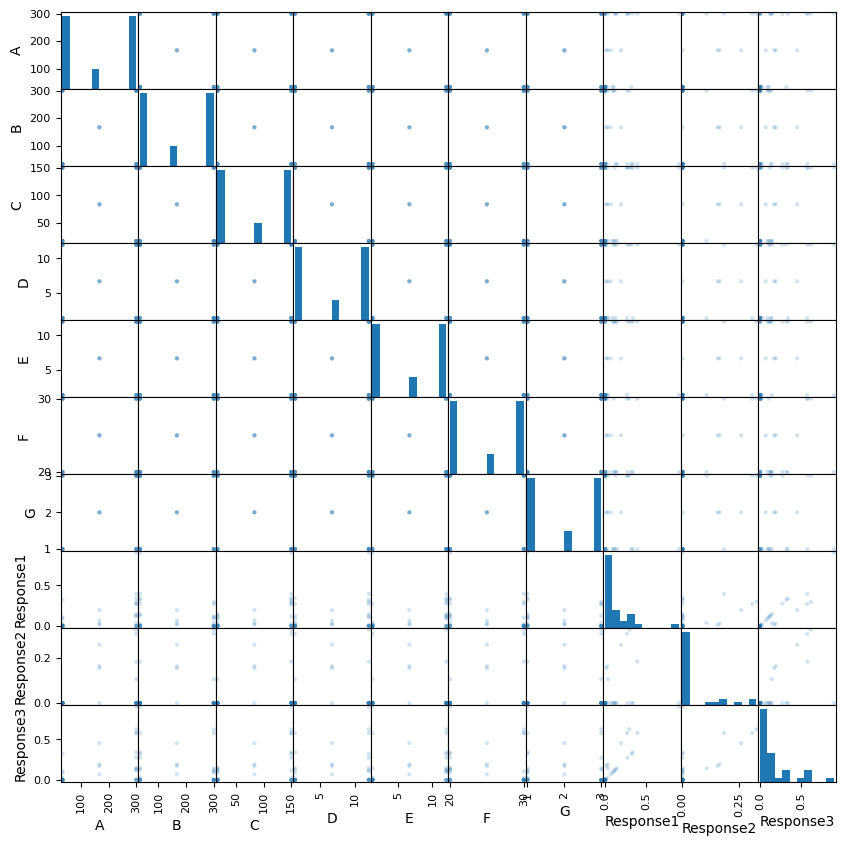

In [61]:
# plot each factor in the dataframe against each other
pd.plotting.scatter_matrix(myDoE, alpha=0.2, figsize=(10, 10), diagonal='hist') #, diagonal='kde'


In [42]:
# https://statease.github.io/dexpy/example-coffee.html
DepVar = 'Response1'
# Parameter for model complexity and factor interactions
# choose: 
# 1 for individual factors only, 
# 2 for two-factor interactions
IntPar = 1


Figure saved as:  ../Data/DoE/230601_DoE_example_Response1-Hist.png


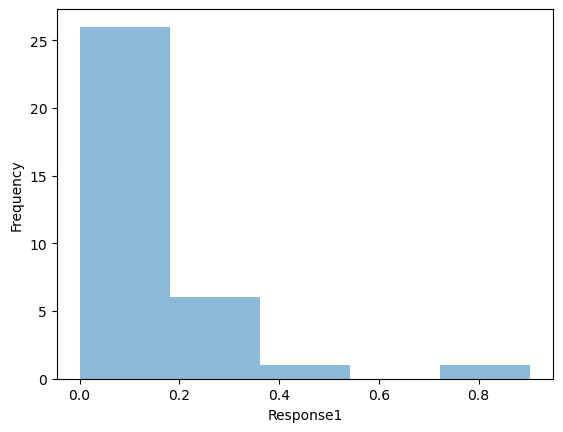

In [56]:
# histogram for Response1 in myDoE
plt.hist(myDoE[DepVar], bins=5, alpha=0.5, label=DepVar)
plt.xlabel(DepVar)
plt.ylabel('Frequency')

FigureHist = '{}_{}_{}-Hist.{}'.format(Today, os.path.splitext(os.path.split(FileAddress)[1])[0], DepVar, ImageType)
FigureHistPath = os.path.join(Target_Dir, FigureHist)
plt.savefig(FigureHistPath)
# print figure adress
print('Figure saved as: ', FigureHistPath)

In [59]:
Corr

A            0.405922
B           -0.278869
C            0.417479
D            0.291045
E            0.166744
F           -0.217441
G           -0.252179
Response1    1.000000
Name: Response1, dtype: float64

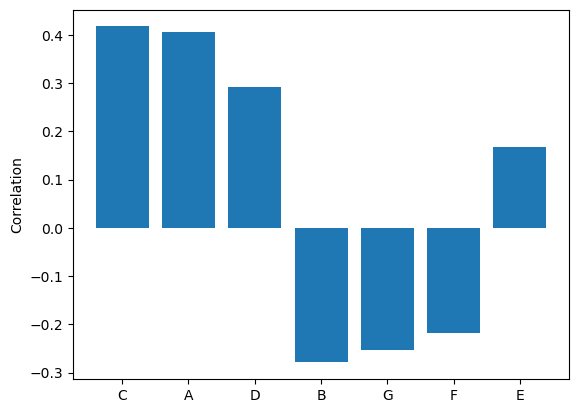

In [60]:
# calculate the correlation of the response factor in CentDoe with the other factors
Corr = CentDoe.iloc[:,0:useCol].corr()[DepVar]
# removing the correlation of the response factor with itself
Corr = Corr.drop(DepVar)
CorrSort = np.argsort(-np.abs(Corr),)
plt.bar(Corr[CorrSort].index,Corr[CorrSort])
plt.ylabel('Correlation')

FigureCorr = '{}_{}_{}-FactComb{}_IndFactCorr.{}'.format(Today, os.path.splitext(os.path.split(FileAddress)[1])[0], DepVar, IntPar, ImageType)
FigureCorrPath = os.path.join(Target_Dir, FigureCorr)
plt.savefig(FigureCorrPath)

In [44]:
OLS_models = '({})**{}'.format('+'.join(CentDoe.columns[:-3]), IntPar)
# Independent factors plus two factor interactions
# IntOLS = "(" + '+'.join(CentDoe.columns[:-3]) + ")**2"
lm = ols('{} ~{}'.format(DepVar,OLS_models), data=CentDoe).fit()
print(lm.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.405  
Dependent Variable: Response1        AIC:                85.7364
Date:               2023-06-01 11:16 BIC:                97.9473
No. Observations:   34               Log-Likelihood:     -34.868
Df Model:           7                F-statistic:        4.204  
Df Residuals:       26               Prob (F-statistic): 0.00322
R-squared:          0.531            Scale:              0.59539
-----------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-----------------------------------------------------------------
Intercept      0.0000    0.1323   0.0000  1.0000  -0.2720  0.2720
A              0.4435    0.1366   3.2462  0.0032   0.1627  0.7243
B             -0.2273    0.1382  -1.6449  0.1120  -0.5113  0.0567
C              0.3904    0.1382   2.8253  0.0090   0.1064  0.6744
D              0.1686    0.1382   1

Pareto plot of absolute coefficients values saved as ../Data/DoE/230531_DoE_example_Response1_OLS-1_FactorCoefficientsP05.png


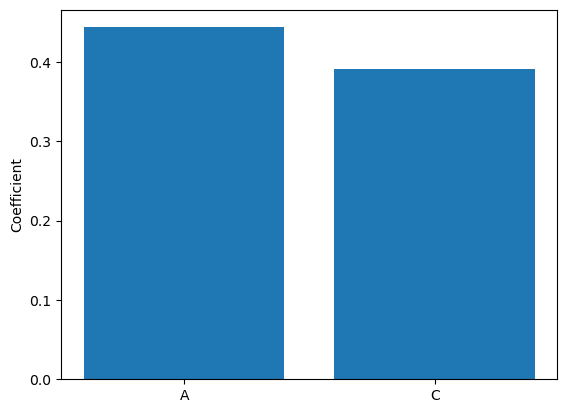

In [6]:
FigureCoef = '{}_{}_{}_OLS-{}_FactorCoefficientsP05.{}'.format(Today, os.path.splitext(os.path.split(FileAddress)[1])[0], DepVar, IntPar, ImageType)
FigureCoefPath = os.path.join(Target_Dir, FigureCoef)

Psig = lm.pvalues<.05
PselCoef = lm.params[Psig]
CoefSort = np.argsort(-np.abs(PselCoef),)
plt.bar(PselCoef[CoefSort].index,np.abs(PselCoef[CoefSort]))
plt.ylabel('Coefficient')
plt.savefig(FigureCoefPath)
print('Pareto plot of absolute coefficients values saved as {}'.format(FigureCoefPath))

## Relevant Factor Selection

Only factors with a p-value above 0.05 are significantly contributing to the prediction.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.322   
Dependent Variable: Response1        AIC:                86.1248 
Date:               2023-05-31 17:52 BIC:                90.7039 
No. Observations:   34               Log-Likelihood:     -40.062 
Df Model:           2                F-statistic:        8.843   
Df Residuals:       31               Prob (F-statistic): 0.000915
R-squared:          0.363            Scale:              0.67781 
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.0000     0.1412   0.0000   1.0000   -0.2880   0.2880
A            0.4357     0.1436   3.0333   0.0049    0.1427   0.7286
C            0.4465     0.1436   3.1087   0.0040    0.1536   0.7395
-----------------------------------------------------------------
Omnibus:       

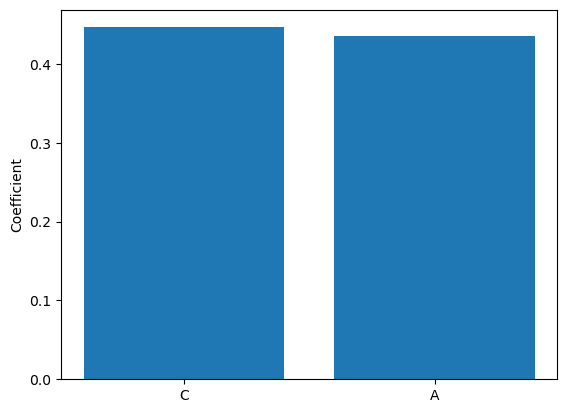

In [7]:
FigureCoef_RedMod = '{}_{}_{}_OLS-Red-{}_FactorCoefficientsP05.{}'.format(Today, os.path.splitext(os.path.split(FileAddress)[1])[0], DepVar, IntPar, ImageType)
FigureCoefPath_RedMod = os.path.join(Target_Dir, FigureCoef)

reduced_model = '+'.join(Psig[Psig].index)
lrm = ols('{} ~ {}'.format(DepVar, reduced_model), data=CentDoe).fit()
print(lrm.summary2())
CoefSort = np.argsort(-np.abs(lrm.params[1:]),)
plt.bar(Psig[Psig].index[CoefSort],np.abs(lrm.params[1:][CoefSort]))
plt.ylabel('Coefficient')
plt.savefig(FigureCoefPath)
print('Pareto plot of absolute coefficients values saved as {}'.format(FigureCoefPath_RedMod))

### Principle component analysis to identify factor combinations and target variable regression

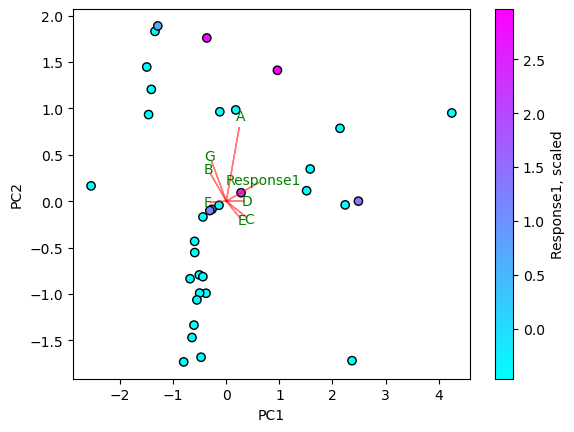

In [79]:
# PCA analysis inspired by:
# https://www.jcchouinard.com/pca-with-python/

# extraction of the first n columns in CentDoe as numpy array
useCol = 8
Xy = CentDoe.iloc[:,0:useCol].values

pca = PCA(n_components=2)

# Fit the data to the PCA model
pca.fit(Xy)

# Transform the data to the principal components
X_pca = pca.transform(Xy)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.cool, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.title("PCA of DoE")
# show color code of z-axis
cbar = plt.colorbar()
# add colorbar text
cbar.set_label('Response1, scaled')

# adding the loading vectors to the plot
for i in range(0, pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], color='r', alpha=0.5)
    plt.text(pca.components_[0,i]* 1.15, pca.components_[1,i] * 1.15, CentDoe.columns[i], color='g', ha='center', va='center')

# saving figure
FigurePCA = '{}_{}_{}-FactComb{}_PCA+Loading.{}'.format(Today, os.path.splitext(os.path.split(FileAddress)[1])[0], DepVar, IntPar, ImageType)
FigurePCAPath = os.path.join(Target_Dir, FigurePCA)
plt.savefig(FigurePCAPath)

Text(0, 0.5, 'Explained Variance')

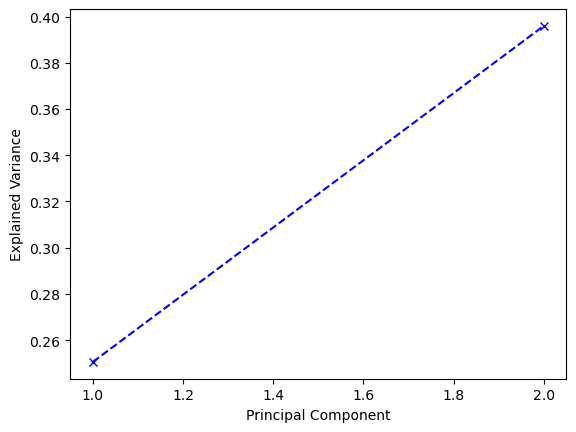

In [80]:
# scree-plot of the cumulative explained variance
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    'xb--',
    label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

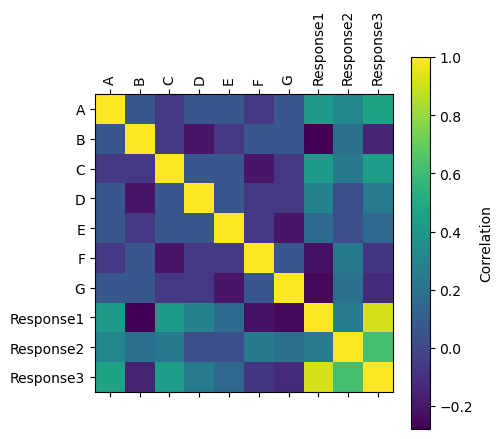

In [81]:
# plot correlation matrix
plt.matshow(CentDoe.corr())
cbar = plt.colorbar()
plt.xticks(range(len(CentDoe.columns)), CentDoe.columns, rotation=90)
plt.yticks(range(len(CentDoe.columns)), CentDoe.columns)
cbar.set_label('Correlation')